<a href="https://colab.research.google.com/github/hansom283/kmuh/blob/main/0325_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import urllib.request as req

url = "https://www.google.com/doodles/json/2022/11?hl=zh-TW"
response = req.urlopen(url)
# response->檔案型態(支援.read())
# json,load(檔案) -> list/dict型態
data_json = json.load(response)
# pd.DataFrame(表格型態)
data_table = pd.json_normalize(data_json)
# 如果你要存檔
data_table.to_csv("doodle.csv", encoding="utf-8")

20230325 AI實體課程
人類思考
1.	公式化
2.	經驗化
3.	機器學習:傳統統計(表格)
4.	深度學習:模仿神經網路(圖片/影片/語言…)

latex math
$ \frac{1}{2}∑_{i=1}^n (x - μ)^2$

**JSON格式**

1.list型態(同類型):[60, 30, 20]

2.dict型態(聚集表示複雜型態):{"姓名":"hansom283", "身高":175}

**key-value**

1.list:key1(0, 1, 2) key2(-3, -2, -1)

2.dict:key自定義(數字/字串/tuple)


key-value最重要的操作(查詢):要查的東西[key]

list[0]/dict["姓名"]

每一個商品存成一個JSON檔案

In [2]:
# open->read->close 會出現close沒有做到的問題
# with ... as 保證會close
import os
base = "google"
if not os.path.exists(base):
  os.makedirs(base)

with open("2022_11.json", "w", encoding="utf-8") as f:
  json.dump(data_json, 
       f,
       ensure_ascii=False,
       indent=4)
# 把每個資料當成一個json
for pic in data_json:
  imgurl = "https:" + pic["high_res_url"]
  fn = imgurl.split("/")[-1]
  fp = os.path.join(base, fn)
  # 下載圖片
  req.urlretrieve(imgurl, fp)
  fn = fn.split(".")[0] + ".json"
  fp = os.path.join(base, fn)
  with open(fp, "w", encoding="utf-8") as f:
    json.dump(pic,
         f,
         ensure_ascii=False,
         indent=4)

還原成json

In [ ]:
import glob
pics = []
for fp in glob.glob("google/*.json"):
    with open(fp, "r", encoding="utf-8") as f:
        p = json.load(f)
        pics.append(p)
pics

抓到巴哈姆特動畫瘋的程式碼(但鎖台灣ip, 所以你一定要用本地才能跑)

In [ ]:
# 抓到巴哈姆特動畫瘋的程式碼(但鎖台灣ip, 所以你一定要用本地才能跑)
import json
import requests
url = "https://ani.gamer.com.tw/ajax/danmuGet.php"
datas = {"sn": "23505"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
}
response = requests.post(url, datas, headers=h)
result = json.loads(response.text)
with open("danmu.txt", "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

In [12]:
# 把彈幕整理成表格
url = "https://github.com/Elwing-Chou/kmu/raw/main/danmu.txt"
req.urlretrieve(url, "danmu.txt")
df = pd.read_json("danmu.txt", encoding="utf-8")
df

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [14]:
# pandas兩種型態:a.Dataframe  b.Series
# 列出每個ID的彈幕次數
df["userid"].value_counts()

BHSN00002p3c    81
lx0220          74
yaooowithred    63
aa001199        45
kokakamui       45
                ..
Aragami2345      1
xiangchi1119     1
POTATO145106     1
K0976129343      1
jerry87617       1
Name: userid, Length: 1109, dtype: int64

In [24]:
# 我要把每個使用者的彈幕取前兩條
df.groupby("userid").head(2)

,text,color,size,position,time,sn,userid
0,祝☆TV動畫化,#B538FA,2,1,0,23255401,kumosorayk
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


pandas最重要的兩個操作:1.篩選、2.轉換

In [22]:
# 篩選 Dataframe[跟你指定一樣多true/false]
# 我要篩選白色的彈幕有哪些
fil = df["color"] == "#FFFFFF"
df[fil]

,text,color,size,position,time,sn,userid
1,要怎麼用雙語,#FFFFFF,1,0,0,28413131,ilovehyunjin
2,20210822,#FFFFFF,1,0,2,22480205,a12365478957
3,卡個,#FFFFFF,1,0,3,22269424,kuojack123
4,2021/10/6五刷,#FFFFFF,1,0,3,23377135,xu3u6xu06
5,是錢讓我們在此相遇,#FFFFFF,1,0,6,23600019,nana013001
...,...,...,...,...,...,...,...
2996,2022.01.16 神作留名,#FFFFFF,1,0,70070,24812125,ilove960914
2997,2022.02.13 神作留名,#FFFFFF,1,0,70070,25346992,cccc8787163
2998,大哥沒有輸，大哥一路走好!,#FFFFFF,1,0,70070,28796341,jeffrey4358
2999,2022.08.09神作留名,#FFFFFF,1,0,70070,28796358,jeffrey4358


In [28]:
# 轉換操作:定義一個轉換(函式) -> apply(函式名稱)
def test(a, b):
  c = a + b
  return c
# 型態/操作(先講型態，才是操作)
# list[0]
# test:步驟SOP型態   ():小括號才是真的執行
test(3, 4)
a = test
a(3, 4)

7

In [29]:
# 統計關鍵詞，使用jieba將中文適當分段
import jieba
import jieba.analyse
url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
req.urlretrieve(url, "bigdic")
jieba.set_dictionary("bigdic")
def change(s):
    return " ".join(jieba.cut(s))
# change("我喜歡你")
result = df["text"].apply(change)
result

Building prefix dict from /content/bigdic ...
DEBUG:jieba:Building prefix dict from /content/bigdic ...
Dumping model to file cache /tmp/jieba.ud6bf8f54c01f90b8d724c40d567237f2.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.ud6bf8f54c01f90b8d724c40d567237f2.cache
Loading model cost 2.355 seconds.
DEBUG:jieba:Loading model cost 2.355 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


0                 祝 ☆ TV 動畫 化
1                   要 怎麼 用 雙語
2                    20210822
3                          卡個
4            2021 / 10 / 6 五刷
                ...          
2996     2022.01 . 16   神作 留名
2997     2022.02 . 13   神作 留名
2998    大哥 沒有 輸 ， 大哥 一路 走 好 !
2999       2022.08 . 09 神作 留名
3000     2022.11 . 10   神作 留名
Name: text, Length: 3001, dtype: object

In [37]:
total = "\n".join(result)
keywords = jieba.analyse.extract_tags(total, withWeight=True, allowPOS=["n"])
keywords

[('大哥', 2.1847287421275228),
 ('炭治郎', 0.20938291706497078),
 ('炎柱', 0.15952984157331107),
 ('好帥', 0.1395886113766472),
 ('正片', 0.13326615230483738),
 ('豆子', 0.09501876635239365),
 ('太太', 0.06831407293421184),
 ('晚安', 0.06574757485971643),
 ('男人', 0.06439994196761467),
 ('肚子', 0.059876997090825695),
 ('變鬼', 0.05982369058999165),
 ('妹妹', 0.05860282866155129),
 ('之刃', 0.05796779671392828),
 ('眼睛', 0.05566103452758965),
 ('首刷', 0.04985307549165971),
 ('玩火', 0.04836569040450375),
 ('乘客', 0.0465992381850709),
 ('抗性', 0.04326237334195162),
 ('鬼片', 0.03988246039332777),
 ('頭柱', 0.03988246039332777)]

靜態視覺化: matplotlib(基礎) -> seaborn(進階)

動態視覺化: plotly altair

countplot: 數數對象是類別型

barplot: 不數數, 我自己給直

histogram(histplot): 數對象是連續型(0-10歲有幾個)

scatterplot: x, y是連續型

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !開始都是 linux指令
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager 

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

<Axes: xlabel='key', ylabel='tfidf'>

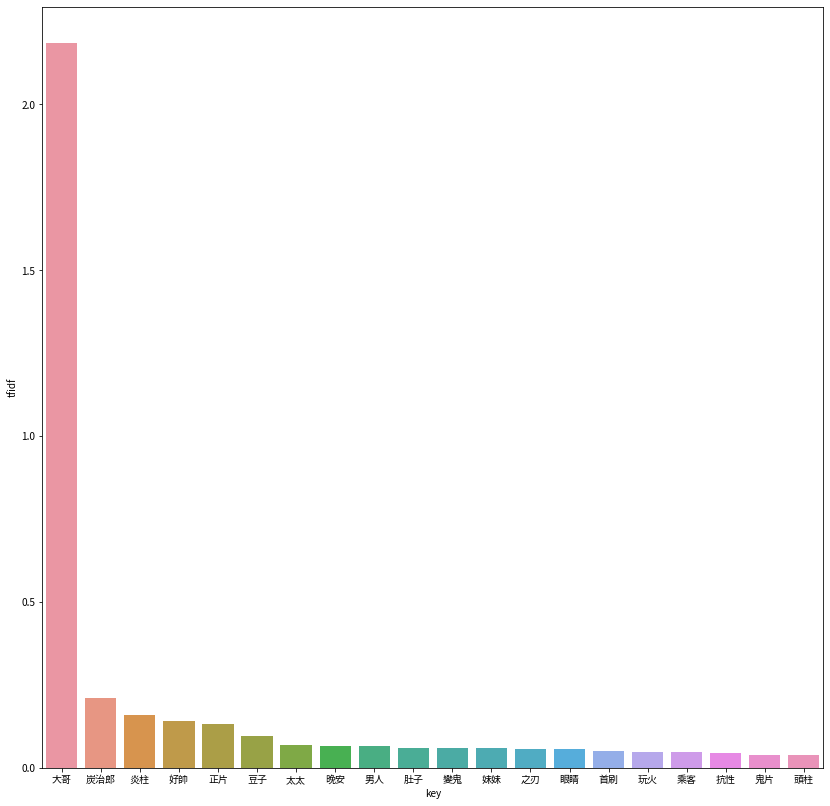

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 14))
# 第一種: x, y都是一個list
xs = [k for k, v in keywords]
ys = [v for k, v in keywords]
# [n ** 2 for n in [0, 1, 2]]
# sns.barplot(x=xs, y=ys)
# 第二種: df
keydf = pd.DataFrame(keywords, columns=["key", "tfidf"])
sns.barplot(data=keydf, x="key", y="tfidf")